# D3 Presents: Data Viz with Python
### Marifel Barbasa | Brock Lanoza | Alex Anich | Kawika Kekahuna
* * * 

<div style="text-align: center;">
    <img 
      src=https://static.festisite.com/static/partylogo/img/logos/nasa.png 
      style="display: inline; margin-right: 100px;"
      width="250px" 
      height="250px" 
    />
    <img 
      src=http://datarave.github.io/20141021/20141021_Chris_Ryan_Transitioning_to_a_Data_Science_Career/logo-python.png 
      style="display: inline; margin-right: 100px" 
      width="250px" 
      height="250px" 
    />
<div/>

## What is this?
* * *

This is a **Jupyter Notebook!** It's an interactive web application that allows you to create documents with inline code snippets. If you don't have it already, install it [here](http://jupyter.org/install.html)

**NOTE:** The above link also includes the necessary steps for installing [Anaconda](https://www.continuum.io/downloads), a distribution that includes all of the most popular packages for dealing with data in python!

## Ok...so what are we gonna do with it?
* * * 
We're going to walk through some cool ways to bring data to life. Looking at a spreadsheet is _boring_...so let's make some graphs!

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This is only necessary when using matplotlib in a notebook
%matplotlib inline

# Read in the data

The dataset we'll be using is already in the repo. If you'd like to see the source along with a bunch of other cool datasets, [check this out!](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh/data)

In [3]:
# using pandas read_csv function
data = pd.read_csv('nasa_meteorite_data.csv')

In [4]:
# check the first few rows to get a peek at the data
data.head()

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location
0,Aachen,1.0,Valid,L5,21.0,Fell,1880-01-01 00:00:00,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2.0,Valid,H6,720.0,Fell,1951-01-01 00:00:00,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6.0,Valid,EH4,107000.0,Fell,1952-01-01 00:00:00,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10.0,Valid,Acapulcoite,1914.0,Fell,1976-01-01 00:00:00,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370.0,Valid,L6,780.0,Fell,1902-01-01 00:00:00,-33.16667,-64.95000,"(-33.166670, -64.950000)"


## A few other ways to check out the data frame...

In [5]:
# see the data types and how many rows there are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name            45716 non-null object
id              45716 non-null float64
nametype        45716 non-null object
recclass        45716 non-null object
mass_g          45585 non-null float64
fall            45716 non-null object
year            45428 non-null object
reclat          38401 non-null float64
reclong         38401 non-null float64
geo_location    38401 non-null object
dtypes: float64(4), object(6)
memory usage: 3.5+ MB


In [6]:
# the opposite of head
data.tail()

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location
45711,Zillah 002,31356.0,Valid,Eucrite,172.0,Found,1990-01-01 00:00:00,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409.0,Valid,"Pallasite, ungrouped",46.0,Found,1999-01-01 00:00:00,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410.0,Valid,H4,3.3,Found,1939-01-01 00:00:00,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357.0,Valid,L6,2167.0,Found,2003-01-01 00:00:00,49.78917,41.50460,"(49.789170, 41.504600)"
45715,Zulu Queen,30414.0,Valid,L3.7,200.0,Found,1976-01-01 00:00:00,33.98333,-115.68333,"(33.983330, -115.683330)"


## Finding important figures in the data

In [7]:
# top 5 largest meteorites
data.sort_values('mass_g',ascending=False).head()

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,geo_location
16383,Hoba,11890.0,Valid,"Iron, IVB",60000000.0,Found,1920-01-01 00:00:00,-19.58333,17.91667,"(-19.583330, 17.916670)"
5336,Cape York,5262.0,Valid,"Iron, IIIAB",58200000.0,Found,1818-01-01 00:00:00,76.13333,-64.93333,"(76.133330, -64.933330)"
5329,Campo del Cielo,5247.0,Valid,"Iron, IAB-MG",50000000.0,Found,1576-01-01 00:00:00,-27.46667,-60.58333,"(-27.466670, -60.583330)"
5333,Canyon Diablo,5257.0,Valid,"Iron, IAB-MG",30000000.0,Found,1891-01-01 00:00:00,35.05000,-111.03333,"(35.050000, -111.033330)"
3433,Armanty,2335.0,Valid,"Iron, IIIE",28000000.0,Found,1898-01-01 00:00:00,47.00000,88.00000,"(47.000000, 88.000000)"


In [8]:
# find the largest meteorite that "fell" or was witnessed falling
largest_fell = data[data['fall'] == 'Fell'].sort_values('mass_g', ascending=False).iloc[0]

print(largest_fell)

name                       Sikhote-Alin
id                                23593
nametype                          Valid
recclass                     Iron, IIAB
mass_g                          2.3e+07
fall                               Fell
year                1947-01-01 00:00:00
reclat                            46.16
reclong                         134.653
geo_location    (46.160000, 134.653330)
Name: 916, dtype: object


## Graphs!

### Meteorite Map

In [72]:
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# For Notebooks
init_notebook_mode(connected=True)

mapbox_access_token = 'pk.eyJ1IjoiYnJvY2tpbml0IiwiYSI6ImNqMXJmbHR4NjAwNTkyeHFtcXFzY2dtZ2sifQ.mb1Unf0SXIMBwxMWXNG_dw'

py.sign_in('brocklanoza', '8QX412EDGqcbYlqZbj0w')

map_data = Data([
    Scattermapbox(
        lat=data['reclat'],
        lon=data['reclong'],
        mode='markers',
        marker=Marker(
            size=d,
            color='green',
            opacity=0.7
        ),
        text=data['name'],
        hoverinfo='text',
        showlegend=True
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39.5501,
            lon=105.7821
        ),
        pitch=0,
        zoom=3
    ),
)

fig = dict(data=map_data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

/Users/brockinit/anaconda3/lib/python3.5/site-packages/plotly/plotly/plotly.py:236: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~brocklanoza/0 or inside your plot.ly account where it is named 'Multiple Mapbox'


### Meteorites over the years 

In [26]:
# Get the year from the date string
def get_year(full_date):
    if type(full_date) == str:
        year = full_date.split('-')[0]
        return int(year)
    else:
        return False

data['year_only'] = data['year'].apply(lambda x: get_year(x))

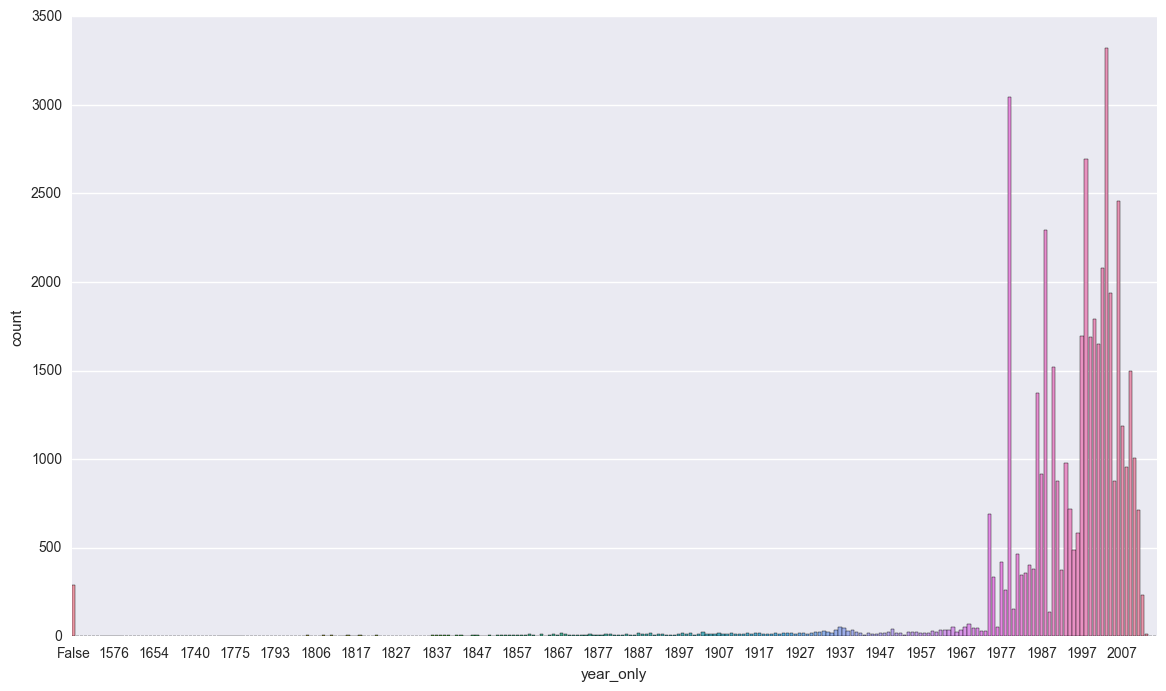

In [70]:
# Make the graph!
plt.figure(figsize=(14,8))

graph = sns.countplot(x="year_only", data=data)
for ind, label in enumerate(graph.get_xticklabels()):
    if ind % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)